In [30]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

import numpy as np
import scipy.io
import joblib
import matplotlib.pyplot as plt


In [2]:
file_path = './datasets/Karabuk_Pavia_Data.mat'
mat = scipy.io.loadmat(file_path)
mat


{'__header__': b'MATLAB 5.0 MAT-file, Platform: PCWIN64, Created on: Fri Feb 25 15:07:09 2022',
 '__version__': '1.0',
 '__globals__': [],
 'PaviaU': array([[1467, 1298, 1298, ..., 1327, 1315,    1],
        [1203, 1295, 1302, ..., 1144, 1126,    1],
        [1341, 1346, 1272, ..., 1123, 1101,    1],
        ...,
        [ 841,  785, 1107, ..., 1275, 1265,    1],
        [1507, 1731, 1581, ..., 1378, 1344,    1],
        [1416, 1114, 1397, ..., 1483, 1489,    1]], dtype=uint16),
 'PaviaX': array([[1467, 1298, 1298, ..., 1346, 1327, 1315],
        [1203, 1295, 1302, ..., 1167, 1144, 1126],
        [1341, 1346, 1272, ..., 1128, 1123, 1101],
        ...,
        [ 841,  785, 1107, ..., 1287, 1275, 1265],
        [1507, 1731, 1581, ..., 1401, 1378, 1344],
        [1416, 1114, 1397, ..., 1490, 1483, 1489]], dtype=uint16),
 'PaviaY': array([[1],
        [1],
        [1],
        ...,
        [1],
        [1],
        [1]], dtype=uint8)}

In [3]:

Data = mat['PaviaU']
Data


array([[1467, 1298, 1298, ..., 1327, 1315,    1],
       [1203, 1295, 1302, ..., 1144, 1126,    1],
       [1341, 1346, 1272, ..., 1123, 1101,    1],
       ...,
       [ 841,  785, 1107, ..., 1275, 1265,    1],
       [1507, 1731, 1581, ..., 1378, 1344,    1],
       [1416, 1114, 1397, ..., 1483, 1489,    1]], dtype=uint16)

In [4]:
Data.shape

(42776, 104)

In [5]:
X = Data[:, 0:103]


In [6]:
y = Data[:,103:104]

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    stratify=Data[:, 103:104], test_size=0.30, random_state=42)


In [8]:
X_train.shape, X_test.shape

((29943, 103), (12833, 103))

In [9]:
X_train.shape, y_train.shape

((29943, 103), (29943, 1))

In [10]:
X_train, y_train

(array([[ 664,  691,  755, ..., 2310, 2331, 2317],
        [1255, 1019,  887, ..., 1611, 1639, 1601],
        [ 750,  501,  481, ..., 4342, 4337, 4422],
        ...,
        [1369, 1467, 1254, ..., 1489, 1480, 1480],
        [1426, 1220, 1099, ..., 1243, 1240, 1265],
        [3264, 3525, 3817, ..., 3718, 3772, 3866]], dtype=uint16),
 array([[6],
        [1],
        [4],
        ...,
        [7],
        [1],
        [5]], dtype=uint16))

In [11]:
clf = XGBClassifier(max_depth=50, learning_rate=0.1,
                    n_estimators=200)
clf = clf.fit(X_train, y_train)


C:\Users\Enes\AppData\Local\Programs\Python\Python37\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\Enes\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\preprocessing\_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Enes\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\preprocessing\_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to 

[13:27:03] WARNING: D:\Build\xgboost\xgboost-1.5.1.git\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [12]:
y_pred = clf.predict(X_test)

acc = str(format(accuracy_score(y_test, y_pred)*100, '.2f'))

print(acc+"%")

94.76%


In [13]:


print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           1       0.95      0.95      0.95      1995
           2       0.98      0.96      0.97      5711
           3       0.83      0.90      0.86       580
           4       0.94      0.96      0.95       907
           5       0.99      0.99      0.99       403
           6       0.89      0.94      0.92      1424
           7       0.86      0.92      0.89       373
           8       0.92      0.88      0.90      1156
           9       1.00      1.00      1.00       284

    accuracy                           0.95     12833
   macro avg       0.93      0.94      0.94     12833
weighted avg       0.95      0.95      0.95     12833



In [14]:


mat = confusion_matrix(y_test, y_pred)
mat

array([[1891,    4,   12,    0,    0,   13,   28,   41,    0],
       [   0, 5501,    0,   38,    0,   55,    0,    1,    0],
       [  10,    4,  520,    0,    0,    1,    1,   94,    0],
       [   0,   49,    0,  867,    1,    2,    0,    0,    0],
       [   3,    0,    0,    0,  400,    0,    0,    0,    0],
       [   4,  150,    0,    2,    2, 1343,    0,    8,    0],
       [  54,    0,    2,    0,    0,    0,  343,    0,    0],
       [  33,    3,   46,    0,    0,   10,    1, 1012,    0],
       [   0,    0,    0,    0,    0,    0,    0,    0,  284]],
      dtype=int64)

In [15]:

joblib.dump(clf, f'./models/XGB_model_ACC_{acc}')

['./XGB_model_ACC_94.76']

In [16]:
file_path = './datasets/PaviaU.mat'
mat = scipy.io.loadmat(file_path)
mat


{'__header__': b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Fri May 20 18:21:46 2011',
 '__version__': '1.0',
 '__globals__': [],
 'paviaU': array([[[ 647,  499,  464, ..., 3221, 3238, 3250],
         [ 604,  546,  527, ..., 2442, 2464, 2528],
         [ 621,  746,  556, ..., 2308, 2345, 2361],
         ...,
         [ 524,  525,  598, ..., 2936, 2940, 2950],
         [ 528,  330,   70, ..., 2737, 2774, 2829],
         [ 711,  483,  423, ..., 2562, 2539, 2488]],
 
        [[ 705,  681,  668, ..., 2607, 2607, 2609],
         [ 891,  692,  453, ..., 1581, 1561, 1522],
         [ 547,  511,  604, ..., 1535, 1531, 1538],
         ...,
         [1149,  658,  434, ..., 3247, 3251, 3277],
         [ 917, 1004,  743, ..., 2828, 2806, 2808],
         [1037,  849,  547, ..., 2491, 2527, 2522]],
 
        [[1084,  875,  706, ..., 2108, 2167, 2183],
         [ 335,  517,  611, ..., 1105, 1109, 1095],
         [1042,  683,  318, ...,  806,  791,  814],
         ...,
         [ 799,  693,  

In [17]:
data = mat['paviaU']

In [18]:
data.shape

(610, 340, 103)

In [19]:
data[0][0]

array([ 647,  499,  464,  371,  291,  319,  365,  322,  296,  305,  277,
        219,  219,  222,  201,  162,  157,  183,  204,  194,  198,  216,
        249,  284,  294,  322,  338,  342,  336,  342,  362,  365,  348,
        341,  324,  316,  293,  274,  251,  244,  263,  248,  236,  254,
        255,  240,  223,  203,  202,  191,  185,  200,  203,  181,  168,
        174,  185,  187,  165,  151,  144,  140,  149,  169,  192,  227,
        287,  376,  493,  633,  763,  913, 1149, 1442, 1759, 2102, 2425,
       2689, 2895, 3058, 3196, 3252, 3195, 3297, 3542, 3550, 3537, 3545,
       3514, 3477, 3468, 3433, 3408, 3420, 3416, 3335, 3256, 3226, 3205,
       3210, 3221, 3238, 3250], dtype=uint16)

In [20]:
new_data = data.reshape(610*340, 103)

In [21]:
loaded_clf = joblib.load(f'./models/XGB_model_ACC_{acc}')
loaded_clf

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.1, max_delta_step=0,
              max_depth=50, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=200, n_jobs=8,
              num_parallel_tree=1, objective='multi:softprob', predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=None,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [22]:
predictions = loaded_clf.predict(new_data)


In [23]:
predictions.shape


(207400,)

In [24]:
image = np.array([np.append(n, np.zeros((1))) for n in new_data])

In [26]:
for i in range(len(image)):
    image[i][-1] = predictions[i]


In [27]:
image = image.reshape(610, 340, 104)


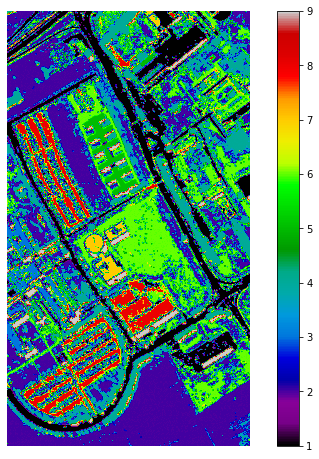

In [35]:
fig = plt.figure(figsize=(10, 8))
plt.imshow(image[:,:,103], cmap='nipy_spectral')
plt.colorbar()
plt.axis('off')
plt.show()
fig.savefig('./images/classified_image.png')